# Project Group 14: Dataset preparation

In [467]:
# Import our dependencies
import pandas as pd 
import numpy as np
import logging 
import random


import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
import sqlalchemy
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, confusion_matrix
from sklearn.svm import SVC
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import OneHotEncoder



# Import our input dataset
heart_disease_df = pd.read_csv('framingham.csv')
heart_disease_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [468]:
# Define the columns
heart_disease_df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [469]:
#Describe the column
heart_disease_df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [470]:
# Find null values
for column in heart_disease_df.columns:
    print(f"Column {column} has {tele_df[column].isnull().sum()}null values")

Column male has 0null values
Column age has 0null values
Column education has 105null values
Column currentSmoker has 0null values
Column cigsPerDay has 29null values
Column BPMeds has 53null values
Column prevalentStroke has 0null values
Column prevalentHyp has 0null values
Column diabetes has 0null values
Column totChol has 50null values
Column sysBP has 0null values
Column diaBP has 0null values
Column BMI has 19null values
Column heartRate has 1null values
Column glucose has 388null values
Column TenYearCHD has 0null values


In [471]:
# Drop null rows
heart_disease_df = heart_disease_df.dropna()

In [472]:
# Find duplicate entries
print(f"Duplicate entries: {heart_disease_df.duplicated().sum()}")

Duplicate entries: 0


In [473]:
# Remove the education column
heart_disease_df.drop(columns=["education"], inplace=True)
heart_disease_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [474]:
# Describe the dataframe
heart_disease_df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [475]:
heart_disease_df.dtypes

male                 int64
age                  int64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [476]:
# Rename the columns of male: gender where 1 = male and 0 = female
updated_heart_disease_df = heart_disease_df.rename(columns = {'male': 'gender'}, inplace = False)
updated_heart_disease_df.head()

,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [477]:
# Saving cleaned data to a new data frame
file_path = "cardiac_heart_disease.csv"
updated_heart_disease_df.to_csv(file_path, index=False)

# Data Exporation

In [478]:
# Checking Heart Disease Rates by age and gender

class_0 = updated_heart_disease_df.loc[updated_heart_disease_df['TenYearCHD'] == 0]["age"]
class_1 = updated_heart_disease_df.loc[updated_heart_disease_df['TenYearCHD'] == 1]["age"]

hist_data = [class_0, class_1]
group_labels = ['Female', 'Male']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Heart Disease Rate Age and Gender Density Plot', xaxis=dict(title='Age [s]'))
iplot(fig, filename='dist_only')


In [479]:
# Let's plot the blood sugar levels(glucose) against age. 
# The age is shown in years from the start of the time period of the given dataset.

blood_sugar_levels = updated_heart_disease_df.loc[updated_heart_disease_df['TenYearCHD'] == 1]

trace = go.Scatter(
    x = blood_sugar_levels['age'],y = blood_sugar_levels['glucose'],
    name="glucose",
     marker=dict(
                color='rgb(238,23,11)',
                line=dict(
                    color='red',
                    width=1),
                opacity=0.5,
            ),
    text= blood_sugar_levels['glucose'],
    mode = "markers"
)
data = [trace]
layout = dict(title = 'Glucose Level By Age',
          xaxis = dict(title = 'Age [s]', showticklabels=True), 
          yaxis = dict(title = 'glucose'),
          hovermode='closest'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='blood_sugar_levels-glucose')

# Random Oversampling with SMOTE

In [480]:
# Setting the target as TenYearCHD and predictors 
target = 'TenYearCHD'
predictors = ['gender','age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',\
              'diabetes', 'totChol', 'sysBP', 'glucose']

In [481]:
# Import libraries for Random Oversampling and Undersampling
import scipy as sci

from imblearn import under_sampling, over_sampling, combine
from sklearn.decomposition import PCA
import plotly.offline as py

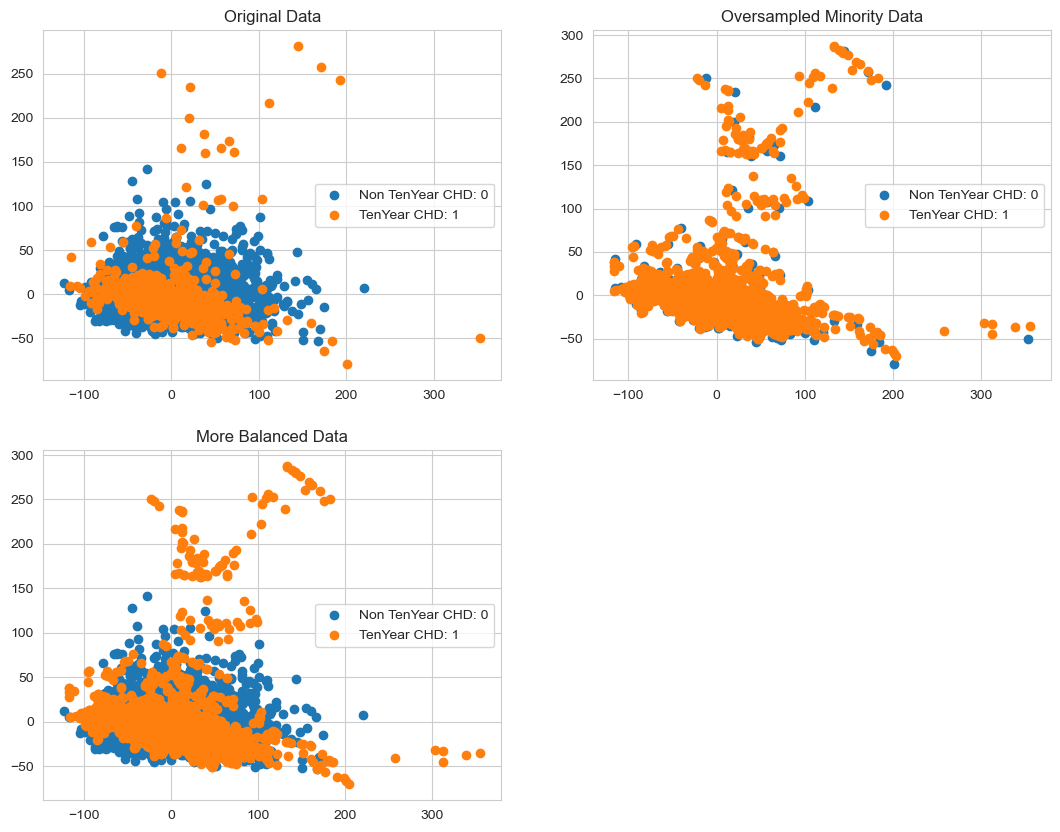

In [482]:
# Split training/testing datasets with Random and SMOTE for TenYearCHD
y = heart_disease_df.TenYearCHD
x = heart_disease_df.drop(columns=['TenYearCHD'])
smo = over_sampling.SMOTE(random_state=1)
resamp_x, resamp_y= smo.fit_resample(x, y)

# Display the confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(resamp_x)
confusion_matrix(resamp_y, y_pred)
# --------------------------------------

# Transform the resampled data into principal components
pca = PCA(n_components=2)
resamp = pd.DataFrame(np.hstack((np.vstack(resamp_y), resamp_x)))

resamp_0 = resamp[resamp[0] == 0.0]
resamp_1 = resamp[resamp[0] == 1.0]
orig_0 = heart_disease_df[heart_disease_df.TenYearCHD == 0]
orig_1 = heart_disease_df[heart_disease_df.TenYearCHD == 1]

orig_no = pca.fit_transform(orig_0)
orig_yes = pca.fit_transform(orig_1)
resamp_no = pca.fit_transform(resamp_0)
resamp_yes = pca.fit_transform(resamp_1)

ono_x = orig_no[:, 0]
ono_y = orig_no[:, 1]
oyes_x = orig_yes[:, 0]
oyes_y = orig_yes[:, 1]
rno_x = resamp_no[:, 0]
rno_y = resamp_no[:, 1]
ryes_x = resamp_yes[:, 0]
ryes_y = resamp_yes[:, 1]

fig, axs = plt.subplots(2, 2, figsize=(13, 10))
axs= axs.flatten()
axs[0].set_title('Original Data')
axs[0].scatter(ono_x, ono_y, label='Non TenYear CHD: 0')
axs[0].scatter(oyes_x, oyes_y, label='TenYear CHD: 1')
axs[1].set_title('Oversampled Minority Data')
axs[1].scatter(oyes_x, oyes_y, label='Non TenYear CHD: 0')
axs[1].scatter(ryes_x, ryes_y, label='TenYear CHD: 1')
axs[2].set_title('More Balanced Data')
axs[2].scatter(ono_x, ono_y, label='Non TenYear CHD: 0')
axs[2].scatter(ryes_x, ryes_y, label='TenYear CHD: 1')
axs[0].legend()
axs[1].legend()
axs[2].legend()
fig.delaxes(axs[3])   
plt.show()

In [483]:

Counter( resamp_y)

Counter({0: 3099, 1: 3099})

In [484]:
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(resamp_x, resamp_y)

C:\Users\Jared\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(random_state=1)

In [485]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(x)
balanced_accuracy_score(y, y_pred)

0.5954051894889358

In [486]:
# Display the confusion matrix
confusion_matrix(y, y_pred)

array([[1960, 1139],
       [ 246,  311]], dtype=int64)

In [487]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.89      0.63      0.56      0.74      0.59      0.36      3099
          1       0.21      0.56      0.63      0.31      0.59      0.35       557

avg / total       0.79      0.62      0.57      0.67      0.59      0.35      3656



# Imbalanced Classification Report
                precision  recall  specificity f1-measure  geometric mean     index balanced accuracy      support

          0       0.89      0.63      0.56      0.74            0.59               0.36                      3099
          1       0.21      0.56      0.63      0.31            0.59               0.35                       557
  
# Average / Total 
                  0.79      0.62      0.57      0.67            0.59               0.35                      3656

# Define predictors and target values


In [488]:
# Let's define the predictor features and the target features. Categorical features, 
# if any, are also defined. In our case, there are no categorical feature.

from sklearn.ensemble import RandomForestClassifier

target = 'TenYearCHD'
predictors = ['gender','age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',\
              'diabetes', 'totChol', 'sysBP', 'glucose']


# Split training/test datasets

In [489]:
train_df, test_df = train_test_split(updated_heart_disease_df, test_size=0.90, random_state=525, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=0.90, random_state=525, shuffle=True )

# Create a Randomforest classifier.

In [490]:
# Initializing the RandomForest Classifier.
clf = RandomForestClassifier(n_jobs=5, 
                             random_state=525,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)

In [491]:
# Training the RandomForest Classifier using the train_df data and fit function.
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_jobs=5, random_state=525, verbose=False)

In [492]:
# Predicting the target values for the valid_df data, using predict function.
preds = clf.predict(valid_df[predictors])

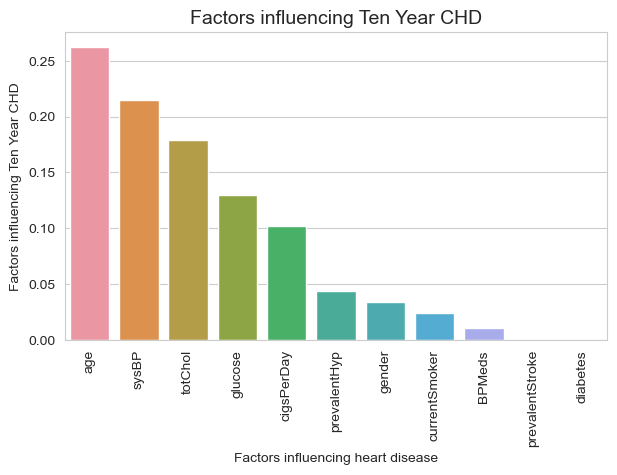

In [493]:
# Visualizing the Factors influencing Ten Year CHD
tmp = pd.DataFrame({'Factors influencing heart disease': predictors, 'Factors influencing Ten Year CHD': clf.feature_importances_})
tmp = tmp.sort_values(by='Factors influencing Ten Year CHD',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Factors influencing Ten Year CHD',fontsize=14)
s = sns.barplot(x='Factors influencing heart disease',y='Factors influencing Ten Year CHD',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

In [494]:
# Calculate the ROC-AUC score. The area under curve

roc_auc_score(valid_df[target].values, preds)

0.6182775712515489

# The roc_auc_score obtained with RandomForrestClassifier is 0.618.

# Support Vector Machine Vs. Deep Learning Model

In [495]:
# Generate our categorical variable list
TenYearCHD_cat = updated_heart_disease_df.dtypes[updated_heart_disease_df.dtypes == "int64"].index.tolist()


# Check the number of unique values in each column
updated_heart_disease_df[TenYearCHD_cat].nunique()

gender              2
age                39
currentSmoker       2
prevalentStroke     2
prevalentHyp        2
diabetes            2
TenYearCHD          2
dtype: int64

In [496]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_heart_disease_df = pd.DataFrame(enc.fit_transform(updated_heart_disease_df[TenYearCHD_cat]))

# Add the encoded variable names to the dataframe
encode_heart_disease_df.columns = enc.get_feature_names(TenYearCHD_cat)
encode_heart_disease_df.head()

C:\Users\Jared\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,gender_0,gender_1,age_32,age_33,age_34,age_35,age_36,age_37,age_38,age_39,...,currentSmoker_0,currentSmoker_1,prevalentStroke_0,prevalentStroke_1,prevalentHyp_0,prevalentHyp_1,diabetes_0,diabetes_1,TenYearCHD_0,TenYearCHD_1
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [497]:
# Remove loan status target from features data
y = encode_heart_disease_df.TenYearCHD_1.values
X = encode_heart_disease_df.drop(columns=["TenYearCHD_0","TenYearCHD_1"]).values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [498]:
# Create the SVM model
svm = SVC(kernel='linear')

In [499]:
# Train the model
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [500]:
# Evaluate the model
y_pred = svm.predict(X_test_scaled)
print(f" SVM model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 SVM model accuracy: 0.848


# Support Vector Machine
SVM model accuracy: 0.848

# Deep Learning Model

In [501]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [502]:
# Train the model 
fit_model = nn.fit(X_train_scaled, y_train, epochs=50) 
# Evaluate the model using the test data 
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=1)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
86/86 [==============================] - 1s 1ms/step - loss: 0.7324 - accuracy: 0.5853
Epoch 2/50
86/86 [==============================] - 0s 1ms/step - loss: 0.5222 - accuracy: 0.7932
Epoch 3/50
86/86 [==============================] - 0s 1ms/step - loss: 0.4495 - accuracy: 0.8457
Epoch 4/50
86/86 [==============================] - 0s 1ms/step - loss: 0.4203 - accuracy: 0.8490
Epoch 5/50
86/86 [==============================] - 0s 1ms/step - loss: 0.4055 - accuracy: 0.8483
Epoch 6/50
86/86 [==============================] - 0s 1ms/step - loss: 0.3965 - accuracy: 0.8479
Epoch 7/50
86/86 [==============================] - 0s 1ms/step - loss: 0.3908 - accuracy: 0.8487
Epoch 8/50
86/86 [==============================] - 0s 1ms/step - loss: 0.3861 - accuracy: 0.8483
Epoch 9/50
86/86 [==============================] - 0s 1ms/step - loss: 0.3837 - accuracy: 0.8490
Epoch 10/50
86/86 [==============================] - 0s 1ms/step - loss: 0.3812 - accuracy: 0.8483
Epoch 11/50
86/86 [

# Deep Learning Model
Loss: 0.4190712571144104, Accuracy: 0.833698034286499